In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_dataset_from_folders(root_dir, target_size=(224,224)):
    """
    Load dataset from categorical folder structure:
    root_dir/class1/*.jpg
    root_dir/class2/*.jpg
    Returns:
        images: numpy array of shape (N, H, W, C)
        labels: numpy array of shape (N,)
        class_names: mapping index -> class
    """
    images, labels = [], []
    class_names = sorted(os.listdir(root_dir))
    class_to_idx = {cls: i for i, cls in enumerate(class_names)}
    
    for cls in class_names:
        cls_path = os.path.join(root_dir, cls)
        if not os.path.isdir(cls_path):
            continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
                img_path = os.path.join(cls_path, fname)
                img = load_img(img_path, target_size=target_size)
                img = img_to_array(img) / 255.0
                images.append(img)
                labels.append(class_to_idx[cls])
    
    return np.array(images), np.array(labels), class_names


In [5]:
import tensorflow.keras
import tensorflow as tf

from tensorflow.keras.models import Model
import numpy as np

# Load pre-trained SqueezeNet model without top (fully connected) layers
pure_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=True, input_shape = (224,224,3))
pure_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
embedding_size = 1024

# Load pre-trained SqueezeNet model without top (fully connected) layers
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape = (224,224,3))

#Remove the last layer of MobileNet
base_model_output = base_model.layers[-1].output

x = base_model.output

# Step 3: Adjust the architecture for retrieval
x = GlobalAveragePooling2D()(x)

# Add the final Dense layer with embedding_size
embeddings = Dense(embedding_size)(x)

# Add L2 normalization layer


class L2Normalization(tf.keras.layers.Layer):
    def __init__(self, axis=-1, epsilon=1e-12, **kwargs):
        super(L2Normalization, self).__init__(**kwargs)
        self.axis = axis
        self.epsilon = epsilon

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=self.axis, epsilon=self.epsilon)
    
    def get_config(self):
        config = super(L2Normalization, self).get_config()
        config.update({'axis': self.axis, 'epsilon': self.epsilon})
        return config

    # Apply L2 normalization
    
embeddings = tf.keras.layers.Dense(embedding_size)(x)
embeddings = L2Normalization()(embeddings)


feature_extraction_model1 = Model(inputs=base_model.input, outputs=embeddings)

feature_extraction_model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,278,464 (16.32 MB)

 Trainable params: 4,256,576 (16.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [13]:
from tensorflow.keras.applications import EfficientNetB0
# Load the base model
base_model2 = EfficientNetB0(weights='imagenet', include_top=False,input_shape = (224,224,3))
base_model2.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model

# Extract intermediate layers
layer4 = base_model2.get_layer('block2a_expand_activation').output
layer5 = base_model2.get_layer('block4a_expand_activation').output
layer6 = base_model2.get_layer('block6a_expand_activation').output
last_layer = base_model2.get_layer('top_activation').output  # Usually the last conv layer before classification

# Apply Global Average Pooling to each layer
layer4 = GlobalAveragePooling2D()(layer4)
layer5 = GlobalAveragePooling2D()(layer5)
layer6 = GlobalAveragePooling2D()(layer6)
last_layer = GlobalAveragePooling2D()(last_layer)  # 1280 features

# Concatenate all features
concatenated_features2 = Concatenate()([layer4, layer5, layer6, last_layer])

# Create the feature extraction model
feature_extraction_model2 = Model(inputs=base_model2.input, outputs=concatenated_features2)

# Check the model summary
feature_extraction_model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [19]:
#obtain file names 
import os
# path to the datasets
db_root_dir = 'C:\\Data Drive\\Datasets\\101_ObjectCategories-20230908T025813Z-001\\101_ObjectCategories'


In [21]:
query_root_dir = 'C:\\Data Drive\\Datasets\\101_ObjectCategories-20230908T025813Z-001\\test'   # <-- put your query images here

In [23]:
def extract_and_save_features(model, images, labels, save_path=None):
    """Extract features from a model, optionally save to NPZ."""
    features = model.predict(images, batch_size=32, verbose=1)
    if save_path:
        np.savez(save_path, features=features, labels=labels)
        print(f"✅ Saved features to {save_path}")
    return features, labels



In [25]:

# Database set
db_images, db_labels, class_names = load_dataset_from_folders(db_root_dir)
print("DB loaded:", db_images.shape, db_labels.shape, "Classes:", len(class_names))

# Query set
query_images, query_labels, _ = load_dataset_from_folders(query_root_dir)
print("Queries loaded:", query_images.shape, query_labels.shape)


DB loaded: (8192, 224, 224, 3) (8192,) Classes: 101
Queries loaded: (505, 224, 224, 3) (505,)


In [26]:
# MobileNet
db_feats_mobilenet, _ = extract_and_save_features(feature_extraction_model1, db_images, db_labels, "mobilenet_features_cattech.npz")
query_feats_mobilenet, _ = extract_and_save_features(feature_extraction_model1, query_images, query_labels)

# EfficientNet
db_feats_efficientnet, _ = extract_and_save_features(feature_extraction_model2, db_images, db_labels, "efficientnet_features_cattech.npz")
query_feats_efficientnet, _ = extract_and_save_features(feature_extraction_model2, query_images, query_labels)

# Combined
db_feats_combined = np.concatenate([db_feats_mobilenet, db_feats_efficientnet], axis=1)
query_feats_combined = np.concatenate([query_feats_mobilenet, query_feats_efficientnet], axis=1)
np.savez("combined_features_caltech.npz", features=db_feats_combined, labels=db_labels)


256/256 ━━━━━━━━━━━━━━━━━━━━ 180s 692ms/step
✅ Saved features to mobilenet_features_cattech.npz
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 757ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step
✅ Saved features to efficientnet_features_cattech.npz
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


In [46]:
# -------------------
# Retrieval Function
# -------------------
def run_retrieval_with_queries(features_db, labels_db, features_query, labels_query, algo="brute", metric, k=80):
    start = time.time()
    nbrs = NearestNeighbors(n_neighbors=k, algorithm="brute" if algo=="bruteforce" else algo, metric=metric)
    nbrs.fit(features_db)

    distances, indices = nbrs.kneighbors(features_query)
    scores = -distances  # higher is better

    mAPs, recalls, precisions, f1s = [], [], [], []
    for i in range(len(labels_query)):
        retrieved_labels = labels_db[indices[i]]
        q_label = labels_query[i]

        # binary relevance
        relevant = (retrieved_labels == q_label).astype(int)

        total_relevant = np.sum(labels_db == q_label)
        if total_relevant == 0:
            continue

        # Precision@k, Recall@k
        prec = np.sum(relevant) / len(relevant)
        rec = np.sum(relevant) / total_relevant
        f1 = (2 * prec * rec) / (prec + rec + 1e-8)

        # Average Precision
        ap = average_precision_score(relevant, scores[i])

        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)
        mAPs.append(ap)

    end = time.time()
    art = (end - start) * 1000 / len(labels_query)  # ms per query

    return np.mean(mAPs), np.mean(recalls), np.mean(f1s), art, scores, indices


# -------------------
# Curve Plotting
# -------------------
def plot_curves(query_labels, scores, indices, db_labels, title, outdir, prefix, k=90):
    y_true, y_score = [], []
    for i in range(len(query_labels)):
        retrieved_labels = db_labels[indices[i]]
        rels = (retrieved_labels == query_labels[i]).astype(int)
        y_true.extend(rels)
        y_score.extend(scores[i])

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    plt.figure()
    plt.plot(recall, precision, label="PR curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall: {title}")
    plt.legend()
    plt.savefig(f"{outdir}/{prefix}_PR.png")
    plt.close()

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC={roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC: {title}")
    plt.legend()
    plt.savefig(f"{outdir}/{prefix}_ROC.png")
    plt.close()




SyntaxError: parameter without a default follows parameter with a default (2257293655.py, line 4)

In [36]:
import time
from tensorflow.keras.applications import MobileNet  
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
import time
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
# Paths
features_dir = "C:\\Users\\asus"

outdir = "C:\\Users\\asus\\results_caltech"
k=5
for algo in ["bruteforce", "ball_tree", "kd_tree"]:
    print(f"Running MobileNet with {algo}...")
    mAP, mAR, F1, art, scores, indices = run_retrieval_with_queries(
        db_feats_mobilenet, db_labels, query_feats_mobilenet, query_labels,
        algo=algo, metric="euclidean", k=k
    )
    plot_curves(query_labels, scores, indices, db_labels, "MobileNet", outdir, f"mobilenet_{algo}", k=k)

    print(f"Running EfficientNet with {algo}...")
    mAP, mAR, F1, art, scores, indices = run_retrieval_with_queries(
        db_feats_efficientnet, db_labels, query_feats_efficientnet, query_labels,
        algo=algo, metric="euclidean", k=k
    )
    plot_curves(query_labels, scores, indices, db_labels, "EfficientNet", outdir, f"efficientnet_{algo}", k=k)

    print(f"Running Combined with {algo}...")
    mAP, mAR, F1, art, scores, indices = run_retrieval_with_queries(
        db_feats_combined, db_labels, query_feats_combined, query_labels,
        algo=algo, metric="euclidean", k=k
    )
    plot_curves(query_labels, scores, indices, db_labels, "Combined", outdir, f"combined_{algo}", k=k)


Running MobileNet with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running EfficientNet with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running Combined with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running MobileNet with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running EfficientNet with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running Combined with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running MobileNet with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running EfficientNet with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

Running Combined with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

In [38]:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc


# -------------------
# Run Experiments
# -------------------
outdir = "results_caltech"
cutoffs = [1, 5, 10, 20, 50]
k_curve = 80

results = []

for model_name, db_feats, query_feats in [
    ("MobileNet", db_feats_mobilenet, query_feats_mobilenet),
    ("EfficientNetB0-Intermediate", db_feats_efficientnet, query_feats_efficientnet),
    ("Combined", db_feats_combined, query_feats_combined)
]:
    for algo in ["bruteforce", "ball_tree", "kd_tree"]:
        print(f"\nRunning {model_name} with {algo}...")

        mAP, mAR, F1, art, scores, indices = run_retrieval_with_queries(
            db_feats, db_labels, query_feats, query_labels,
            algo=algo, metric="euclidean", k=k_curve
        )

        # Store results
        results.append([model_name, algo, mAP, mAR, F1, art])
        print(f"  mAP={mAP:.4f}, Recall={mAR:.4f}, F1={F1:.4f}, ART={art:.2f} ms/query")

        # Plot curves
        plot_curves(query_labels, scores, indices, db_labels, model_name, outdir, f"{model_name}_{algo}", k=k_curve)

# Save summary
summary_df = pd.DataFrame(results, columns=["Model", "Algorithm", "mAP", "mAR", "F1", "ART(ms)"])
summary_df.to_csv("retrieval_summary_caltech.csv", index=False)
print("\nSaved retrieval_summary_caltech.csv")



Running MobileNet with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7183, Recall=0.5749, F1=0.4640, ART=2.98 ms/query

Running MobileNet with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7183, Recall=0.5749, F1=0.4640, ART=34.68 ms/query

Running MobileNet with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7183, Recall=0.5749, F1=0.4640, ART=51.41 ms/query

Running EfficientNetB0-Intermediate with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

  mAP=0.1475, Recall=0.0407, F1=0.0355, ART=2.99 ms/query

Running EfficientNetB0-Intermediate with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

  mAP=0.1475, Recall=0.0407, F1=0.0355, ART=50.89 ms/query

Running EfficientNetB0-Intermediate with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No posi

  mAP=0.1475, Recall=0.0407, F1=0.0355, ART=36.68 ms/query

Running Combined with bruteforce...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7181, Recall=0.5729, F1=0.4626, ART=2.12 ms/query

Running Combined with ball_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7181, Recall=0.5729, F1=0.4626, ART=107.26 ms/query

Running Combined with kd_tree...


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


  mAP=0.7181, Recall=0.5729, F1=0.4626, ART=146.56 ms/query


PermissionError: [Errno 13] Permission denied: 'retrieval_summary_caltech.csv'

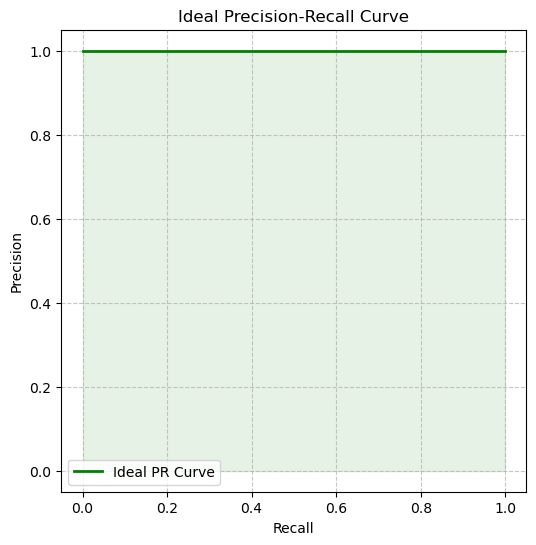

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ideal_pr_curve():
    # Recall from 0 → 1
    recall = np.linspace(0, 1, 100)
    # Ideal precision = 1 everywhere until full recall
    precision = np.ones_like(recall)

    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, label="Ideal PR Curve", color="green", linewidth=2)
    plt.fill_between(recall, precision, alpha=0.1, color="green")
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Ideal Precision-Recall Curve")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

plot_ideal_pr_curve()


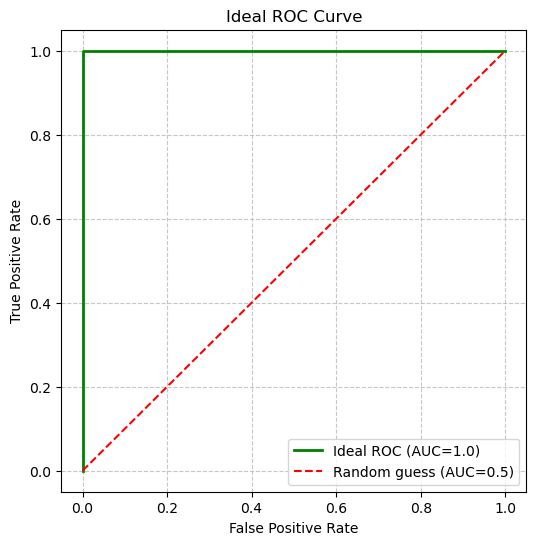

In [43]:
import matplotlib.pyplot as plt

def plot_ideal_roc_curve():
    # Ideal ROC curve points
    fpr = [0, 0, 1]   # False Positive Rate
    tpr = [0, 1, 1]   # True Positive Rate

    plt.figure(figsize=(6,6))
    # Plot ideal ROC
    plt.plot(fpr, tpr, color='green', linewidth=2, label="Ideal ROC (AUC=1.0)")
    # Plot random baseline
    plt.plot([0,1], [0,1], color='red', linestyle="--", label="Random guess (AUC=0.5)")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Ideal ROC Curve")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

plot_ideal_roc_curve()
